# Uçuş Varış Gecikmesi Tahmin Modeli

Bu projede  bir uçuşun değişkenlere bağlı olarak varışta ne kadar gecikeceğinin tahmin edilmesi amaçlanmaktadır. Bu bir regresyon problemidir ve gözetimli öğrenme algoritmaları kullanılacaktır.

Veri Setinde Bulunan Özellikler (Features):

'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'

Veri Setinde Bulunan Özelliklerin Açıklamaları : 

Unnamed: 0 – Satır numarası 
Year – Uçuş yılı
Month – Uçuşun gerçekleştiği ay
DayofMonth – Uçuşun gerçekleştiği ayın kaçıncı günü
DayOfWeek – Uçuşun gerçekleştiği haftanın günü (1 = Pazartesi, 7 = Pazar)
DepTime – Gerçek kalkış saati (saat*dakika formatında, örn: 1530 → 15:30)
CRSDepTime – Planlanan (zaman çizelgesindeki) kalkış saati
ArrTime – Gerçek varış saati
CRSArrTime – Planlanan (zaman çizelgesindeki) varış saati
UniqueCarrier – Havayolu şirketi kodu (örnek: AA = American Airlines)
FlightNum – Uçuş numarası
TailNum – Uçağın kuyruk numarası (benzersiz uçak kimliği)
ActualElapsedTime – Gerçekleşen toplam uçuş süresi (dakika cinsinden)
CRSElapsedTime – Planlanan toplam uçuş süresi (dakika cinsinden)
AirTime – Uçağın havada geçirdiği süre (dakika)
ArrDelay – Varış gecikmesi (dakika)
DepDelay – Kalkış gecikmesi (dakika)
Origin – Kalkış havaalanı kodu (örn. JFK, LAX)
Dest – Varış havaalanı kodu
Distance – Uçuş mesafesi (mil cinsinden)
TaxiIn – Uçağın piste indikten sonra kapıya taksi süresi (dakika)
TaxiOut – Uçağın kapıdan ayrıldıktan sonra kalkışa kadar geçen taksi süresi (dakika)
Cancelled – Uçuş iptal edildi mi? (1 = Evet, 0 = Hayır)
CancellationCode – İptal nedeni (A = Taşıyıcı, B = Hava durumu, C = Ulusal hava sistemi, D = Güvenlik)
Diverted – Uçuş yön değiştirdi mi? (1 = Evet, 0 = Hayır)
CarrierDelay – Havayolu kaynaklı gecikme süresi (dakika)
WeatherDelay – Hava koşulları kaynaklı gecikme süresi (dakika)
NASDelay – Ulusal Hava Sistemi (hava trafik kontrolü vb.) kaynaklı gecikme süresi (dakika)
SecurityDelay – Güvenlik kaynaklı gecikme süresi (dakika)
LateAircraftDelay – Uçağın önceki uçuşunun geç kalmasından kaynaklı gecikme süresi (dakika)



# VERİ SETİNİN YÜKLENMESİ

Veri seti CSV formatında olup,'Yıl', 'Ay', 'Ayın Günü', 'Haftanın Günü', 'Uçuş Saati', 'Tahmini Kalkış Vakti', 'Varış Saati', 'CRS Ertesi Saati', 'Benzersiz Taşıyıcı', 'Uçuş Saati', 'Kuyruk Saati', 'Gerçek Geçen Saat', 'Tahmini Uçuş Süresi', 'Hava Süresi', 'Varış Gecikmesi', 'Uçuş Gecikmesi', 'Menşei', 'Varış', 'Mesafe', 'Taksi Girişi', 'Taksi Çıkışı', 'İptal Edildi', 'İptal Kodu', 'Yönlendirildi', 'Taşıyıcı Gecikmesi', 'Hava Gecikmesi', 'NAS Gecikmesi', 'Güvenlik Gecikmesi', 'Uçak Gecikmesi'içermektedir.

In [1]:
import pandas as pd

df = pd.read_csv("/Users/sehersavas/Desktop/DelayedFlights.csv")
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


# KEŞİFSEL VERİ ANALİZİ

In [2]:
print(df.head())
print(f"\nVeri kümesinin boyutu: {df.shape[0]} satır, {df.shape[1]} sütun")
print("\nSütunlar:")
print(df.columns.tolist())
print("\nVeri tipleri:")
print(df.dtypes)
print("\nEksik veri sayısı:")
print(df.isnull().sum())

df.describe(include='all' )

   Unnamed: 0  Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  \
0           0  2008      1           3          4   2003.0        1955   
1           1  2008      1           3          4    754.0         735   
2           2  2008      1           3          4    628.0         620   
3           4  2008      1           3          4   1829.0        1755   
4           5  2008      1           3          4   1940.0        1915   

   ArrTime  CRSArrTime UniqueCarrier  ...  TaxiIn TaxiOut  Cancelled  \
0   2211.0        2225            WN  ...     4.0     8.0          0   
1   1002.0        1000            WN  ...     5.0    10.0          0   
2    804.0         750            WN  ...     3.0    17.0          0   
3   1959.0        1925            WN  ...     3.0    10.0          0   
4   2121.0        2110            WN  ...     4.0    10.0          0   

   CancellationCode  Diverted  CarrierDelay  WeatherDelay NASDelay  \
0                 N         0           NaN         

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1.936758e+06,1936758.0,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.936758e+06,1936758,...,1.929648e+06,1.936303e+06,1.936758e+06,1936758,1.936758e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,...,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WN,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,377602,...,NaN,NaN,NaN,1936125,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.341651e+06,2008.0,6.111106e+00,1.575347e+01,3.984827e+00,1.518534e+03,1.467473e+03,1.610141e+03,1.634225e+03,NaN,...,6.812975e+00,1.823220e+01,3.268348e-04,NaN,4.003598e-03,1.917940e+01,3.703571e+00,1.502164e+01,9.013714e-02,2.529647e+01
std,2.066065e+06,0.0,3.482546e+00,8.776272e+00,1.995966e+00,4.504853e+02,4.247668e+02,5.481781e+02,4.646347e+02,NaN,...,5.273595e+00,1.433853e+01,1.807562e-02,NaN,6.314722e-02,4.354621e+01,2.149290e+01,3.383305e+01,2.022714e+00,4.205486e+01
min,0.000000e+00,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,NaN,...,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.517452e+06,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.203000e+03,1.135000e+03,1.316000e+03,1.325000e+03,NaN,...,4.000000e+00,1.000000e+01,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.242558e+06,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.545000e+03,1.510000e+03,1.715000e+03,1.705000e+03,NaN,...,6.000000e+00,1.400000e+01,0.000000e+00,NaN,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00
75%,4.972467e+06,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+03,1.815000e+03,2.030000e+03,2.014000e+03,NaN,...,8.000000e+00,2.100000e+01,0.000000e+00,NaN,0.000000e+00,2.100000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.300000e+01


Veri setinde toplam 1.936.758 satır ve 30 sütun bulunmaktadır. Yaklaşık 690.000 satırda eksik veri vardır, eksik veri temizleme işlemi gerekmektedir. UniqueCarrier (hava yolu kodu), TailNum (uçak kuyruk numarası), Origin (kalkış havaalanı kodu) ,Dest (varış havaalanı kodu),CancellationCode (iptal sebebi) (object), geri kalan veriler sayısal formdadır. Veri Ön İşleme esnasında gerekli dönüşümler yapılacaktır.

# Veri Temizliği - Eksik Veri Olan Satırların Temizlenmesi

In [3]:
df_cleaned = df.dropna()

print("Yeni veri kümesinin boyutu:", df_cleaned.shape)

Yeni veri kümesinin boyutu: (1247486, 30)


Veri setinde eksik veri bulunan satırlar temizlendikten sonra veriseti 1.247.486 satır ve 30 sütundan oluşmaktadır.

# Keşifsel Veri Analizi- Hedef Değişkene ait Bilgilerin Edinilmesi

In [4]:
print("ArrDelay İstatistikleri:\n", df_cleaned['ArrDelay'].describe())

ArrDelay İstatistikleri:
 count    1.247486e+06
mean     6.329104e+01
std      6.075380e+01
min      1.500000e+01
25%      2.600000e+01
50%      4.300000e+01
75%      7.900000e+01
max      2.461000e+03
Name: ArrDelay, dtype: float64


Hedef değişken olarak belirlenecek olan "ArrDelay" sütunun istatistik bilgilerine bakıldığında;

Ortalama Gecikme (mean): 63.29 dakika — oldukça yüksek bir gecikme ortalaması olduğu sistematik bir gecikme durumu olabileceği,

Standart Sapma (std): 60.75 dakika — veri çok dağıldığı bazı uç değerler olabileceği,

Minimum Gecikme (min): 15 dakika — verisetinde sadece gecikmeli uçuşların olduğu,

Medyan (50%): 43 dakika — çoğu uçuşun ortalamaya göre biraz daha az geciktiği,

%75'lik dilim (75%): 79 dakika — uçuşların %25’lik bir kesiminin 79 dakikadan fazla geciktiği,

Maksimum (max): 2461 dakika (!) — Max değerin  aykırı (outlier) olduğu,

tespit edilmiştir.

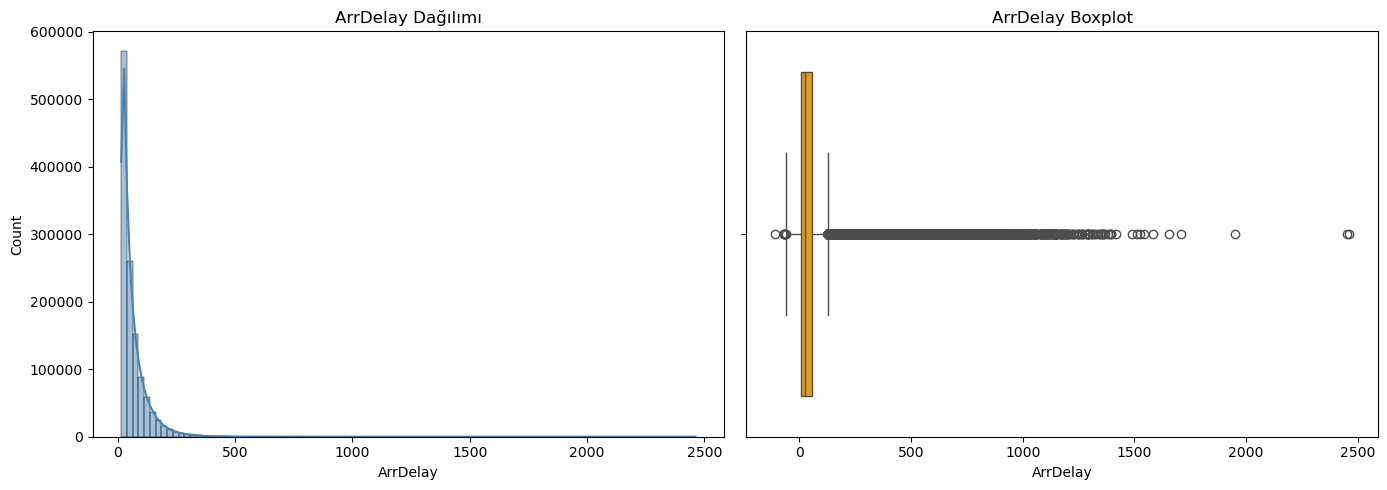

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['ArrDelay'], bins=100, kde=True, color='steelblue')
plt.title('ArrDelay Dağılımı')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['ArrDelay'], color='orange')
plt.title('ArrDelay Boxplot')

plt.tight_layout()
plt.show()

ArrDelay değişkeninin histogram grafiğine bakıldığında çoğu gecikmenin 0-250 dakika arasında olduğu ancak 250 dakikadan fazla olan tekil durumların olduğu bu nedenle aykırı değerler olduğu gözlenmiştir.Boxplot grafiğine bakıldığında ise 2500 dakikaya kadar devam eden uç değerler olduğu görülmektedir.

# Keşifsel Veri Analizi ve Temizliği - Hedef Değişkenin Uç Değerlerinin Tespiti ve Temizlenmesi

In [6]:

initial_count = df_cleaned.shape[0]
df_filtered = df_cleaned[df_cleaned['ArrDelay'] <= 250]
filtered_count = df_filtered.shape[0]

outliers_removed = initial_count - filtered_count

print(f"Çıkarılan uç değer sayısı (ArrDelay > 250): {outliers_removed}")
print(f"Kalan veri sayısı: {filtered_count}")
print("Eksik veri var mı?:", df_filtered.isnull().sum().sum())



Çıkarılan uç değer sayısı (ArrDelay > 250): 20682
Kalan veri sayısı: 1226804
Eksik veri var mı?: 0


Uç değer analizinde, ArrDelay (varış gecikmesi) değişkeni için gecikmelerin 250 dakikaya kadar yoğunlaştığı görüldüğünden 250 dakikanın üzerindeki 20.682 veri uç değer kabul edilip temizlenmiştir, kalan veri sayısı 1.226.804 olmuştur. Eksik veri olup olmadığı kontrol edilmiş, eksik veri olmadığı sonucuna ulaşılmıştır.

# Keşifsel Veri Analizi - Hedef Değişken ile Özelliklerin İlişkisinin İncelenmesi

ArrDelay ile korelasyonlar:
ArrDelay             1.000000
DepDelay             0.919636
LateAircraftDelay    0.514886
NASDelay             0.407146
CarrierDelay         0.348499
TaxiOut              0.231849
WeatherDelay         0.217658
TaxiIn               0.110449
ActualElapsedTime    0.080150
FlightNum            0.047726
CRSElapsedTime       0.025182
AirTime              0.020934
Distance             0.005581
SecurityDelay       -0.003423
Name: ArrDelay, dtype: float64


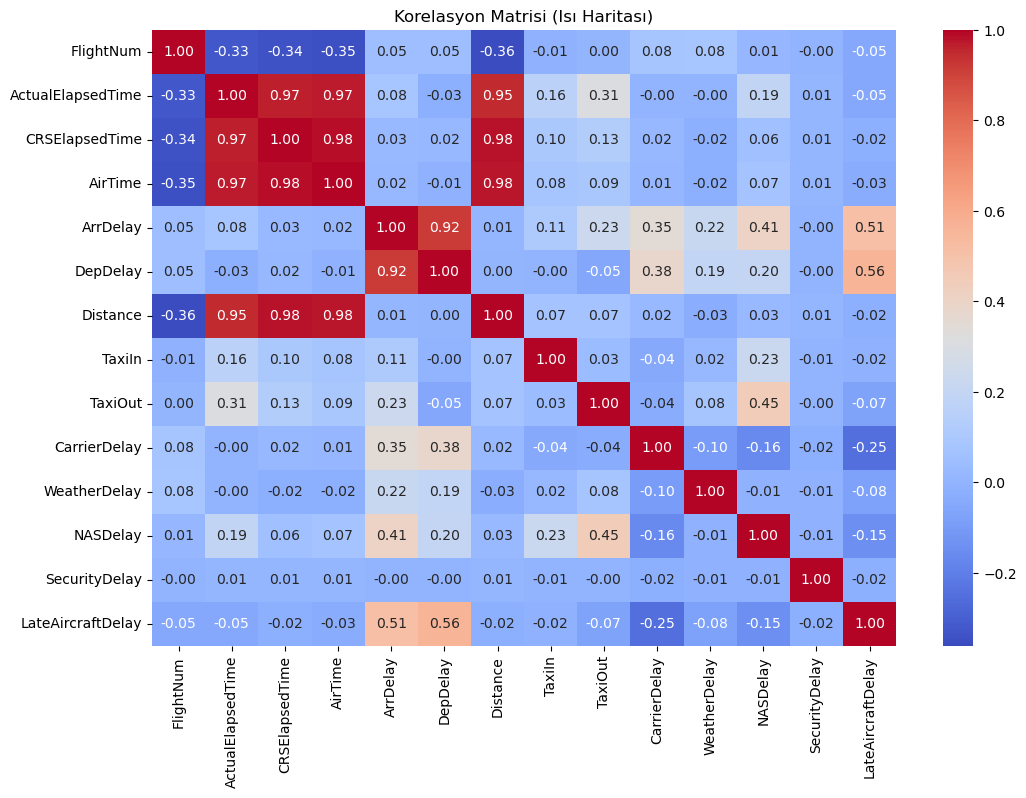

In [7]:

null_cols = ['Month', 'DayofMonth', 'Year', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'Diverted', 'Cancelled', 'Unnamed: 0' ]

binary_cols = [col for col in df_filtered.columns if df_filtered[col].nunique() == 2]

numeric_cols = df_filtered.select_dtypes(include=['int64', 'float64']).columns.tolist()

cols_to_use = [col for col in numeric_cols if col not in null_cols + binary_cols]


if 'ArrDelay' not in cols_to_use:
    cols_to_use.append('ArrDelay')

corr_matrix = df_filtered[cols_to_use].corr()

print("ArrDelay ile korelasyonlar:")
print(corr_matrix['ArrDelay'].sort_values(ascending=False))

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Korelasyon Matrisi (Isı Haritası)')
plt.show()


Korelasyon analizi yapılırken öncelikle,  null_cols adlı liste oluşturulmuş ve içine zamanla ilgili sütunlar (Month, DayofMonth, Year, DayOfWeek, DepTime, CRSDepTime, ArrTime, CRSArrTime) ile ayrıca modelde anlamlı katkısı olmayabilecek ve analiz dışı bırakılmak istenen Diverted, Cancelled ve indeks görevi gören Unnamed: 0 sütunları eklenmiştir. Bu özellikler korelasyon analizinden çıkarılarak model karmaşasının önüne geçilmek ve anlamlı korelasyonlar elde etmek amaçlanmıştır. 
Sonrasında, veri içindeki ikili (binary) sütunlar binary_cols olarak tespit edilerek korelasyon analizinde yanıltıcı sonuç alınmasının önüne geçilmiştir.
Daha sonra tüm sayısal sütunlar (numeric_cols) seçilmiş ve null_cols ile binary_cols listelerindeki sütunlar çıkarılarak, korelasyonda kullanılacak sütunlar (cols_to_use) oluşturulmuştur. Böylece zamanla ilgili, binary ve gereksiz sütunlar analiz dışında bırakılmıştır.  . Kalan sayısal sütunlar arasında korelasyon matrisi hesaplanıp ArrDelay ile olan korelasyonlar yazdırılmış ve görselleştirilmiştir. 

Korelasyon analizine göre hedef değişken olan ArrDelay (varış gecikmesi) ile en güçlü pozitif ilişkiye sahip değişken DepDelay (kalkış gecikmesi) olup, oldukça yüksek bir korelasyon katsayısı (0.92) ile olup, kalkış gecikmesinin varış gecikmesini doğrudan etkilediğini açıkça ortaya koymaktadır. Onu sırasıyla LateAircraftDelay (0.51), NASDelay (0.41), CarrierDelay (0.35) ve TaxiOut (0.23) takip etmektedir; bu da uçaktaki önceki gecikmelerin, ulusal hava trafik sistemindeki aksamaların ve havayolu kaynaklı gecikmelerin önemli katkılar sağladığını göstermektedir. TaxiIn, ActualElapsedTime ve FlightNum gibi değişkenler daha düşük düzeyde korelasyon gösterirken, Distance ve SecurityDelay gibi değişkenlerin ArrDelay üzerinde neredeyse hiçbir etkisinin olmadığı anlaşılmaktadır. Genel olarak bu analiz, özellikle operasyonel ve sistemsel gecikmelerin varış saatine etkisinin belirgin olduğunu ortaya koymaktadır.

# Veri Temizliği - Düşük İlişkili Özelliklerin Temizlenmesi

In [8]:
selected_features = [
    'DepDelay', 'LateAircraftDelay', 'NASDelay', 'CarrierDelay',
    'TaxiOut', 'WeatherDelay', 'TaxiIn', 'ArrDelay' ]

all_columns = df_cleaned.columns.tolist()

columns_to_drop = [col for col in all_columns if col not in selected_features]

df_selected = df_cleaned.drop(columns=columns_to_drop)

print("Çıkarılan sütunlar:", columns_to_drop)
print("Yeni veri seti sütunları:", df_selected.columns.tolist())
print("Yeni df_cleaned boyutu:", df_selected.shape)



Çıkarılan sütunlar: ['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'Origin', 'Dest', 'Distance', 'Cancelled', 'CancellationCode', 'Diverted', 'SecurityDelay']
Yeni veri seti sütunları: ['ArrDelay', 'DepDelay', 'TaxiIn', 'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'LateAircraftDelay']
Yeni df_cleaned boyutu: (1247486, 8)


Hedef değişken ArrDelay ile güçlü korelasyon göstermeyen ve model performansına anlamlı katkı sağlamayan sütunlar çıkarılmıştır. Özellikle zaman bilgisi veren ‘Year’, ‘Month’, ‘DayofMonth’, ‘DayOfWeek’, ‘DepTime’, ‘CRSDepTime’, ‘ArrTime’ ve ‘CRSArrTime’ gibi sütunlar, doğrudan uçuş gecikmesini açıklamakta zayıf kaldıkları ve zamana bağlı yapısal farklılıklar nedeniyle modelde karmaşıklık yaratabileceği için çıkarıldı. Ayrıca, ikili (binary) ve sabit değerli sütunlar olan ‘Cancelled’, ‘Diverted’ ve ‘Unnamed: 0’ gibi sütunlar da modelin performansını olumsuz etkileyebileceğinden çıkarıldı. Bunun yerine, uçuş gecikmesini doğrudan etkileyen ve korelasyonu yüksek olan ‘DepDelay’, ‘LateAircraftDelay’, ‘NASDelay’, ‘CarrierDelay’, ‘WeatherDelay’, ‘TaxiOut’, ‘TaxiIn’,  gibi sayısal değişkenler korundu. Veri setinin yeni boyutu 1.247.486 satır ve 8 sütundan oluşmaktadır. Böylece modelin hem daha anlamlı değişkenlerle beslenmesi hem de gereksiz gürültü azaltılarak daha sağlam ve açıklayıcı hale getirilmesi amaçlanmıştır.

# Veri Ön İşleme/Özellik Mühendisliği - Hedef Değişkenin Kategorilere Ayrılması

In [9]:

df_selected['ArrDelay_raw'] = df_selected['ArrDelay']

def delay_class_4_v2(x):
    if x <= 30: 
        return 1  # Kısa gecikme
    elif x <= 50:
        return 2  # Orta gecikme
    elif x <= 80:
        return 3  # Uzun gecikme
    else:
        return 4  # Çok uzun gecikme

df_selected['DelayClass'] = df_selected['ArrDelay'].apply(delay_class_4_v2)

print("Gecikme sınıflarına göre veri dağılımı:")
print(df_selected['DelayClass'].value_counts())



Gecikme sınıflarına göre veri dağılımı:
DelayClass
1    417008
4    302764
2    295022
3    232692
Name: count, dtype: int64


Modelde logistic regression algoritmasının uygulanabilmesi ve gecikme sürelerinin anlamlı kategorilere ayrılması amacıyla hedef değişken olan "ArrDelay" dört sınıfa bölünmüştür. Bu sınıflandırma, uçuş gecikmelerinin gerçek hayattaki operasyonel etkilerini yansıtacak şekilde belirlenmiştir.

0 ile 30 dakika arası gecikmeler kısa gecikme olarak kabul edilmiş ve 1. sınıf olarak tanımlanmıştır. Bu aralık, yolcuların çoğunlukla kabul edilebilir bulduğu hafif gecikmeleri temsil eder. Bu kategoride 417.008 veri bulunmaktadır.

31 ile 50 dakika arası gecikmeler orta düzey gecikmeler olup, operasyonel anlamda rahatsızlık yaratabilecek fakat yönetilebilir gecikmeler olarak 2. sınıfa ayrılmıştır. Bu kategoride 302.764 bulunmaktadır.

51 ile 80 dakika arası gecikmeler uzun gecikme kategorisindedir ve uçuşların ciddi şekilde etkilenebileceği durumları ifade eder; bu nedenle 3. sınıf olarak belirlenmiştir. Bu kategoride 295.022 veri bulunmaktadır.

80 dakikadan fazla olan gecikmeler ise kritik derecede uzun gecikmeler olarak değerlendirilmiş ve 4. sınıf olarak tanımlanmıştır. Bu tür gecikmeler genellikle yolcu memnuniyetini ve havayolu operasyonlarını ciddi şekilde etkiler. Bu kategoride 232.692 veri bulunmaktadır.

Bu sınıflandırma sonucunda "DelayClass" adında yeni bir hedef değişken oluşturulmuştur. Bu sınıflar, modelin uçuş gecikmelerini daha net ve anlamlı biçimde tahmin etmesini sağlamakta ve gerçek hayattaki operasyonel etkiler ile uyumlu sonuçlar üretmesine olanak tanımaktadır. Bununla beraber, modelde ve görselleştirmede kullanılmak üzere orijinal 'ArrDelay' değişkeni de tutulmuştur.

# Kalan En Yüksek Korelasyonlu Değişkenlerin Hedef Değişken ile İlişkisi

***DepDelay-ArrDelay İlişkisi***

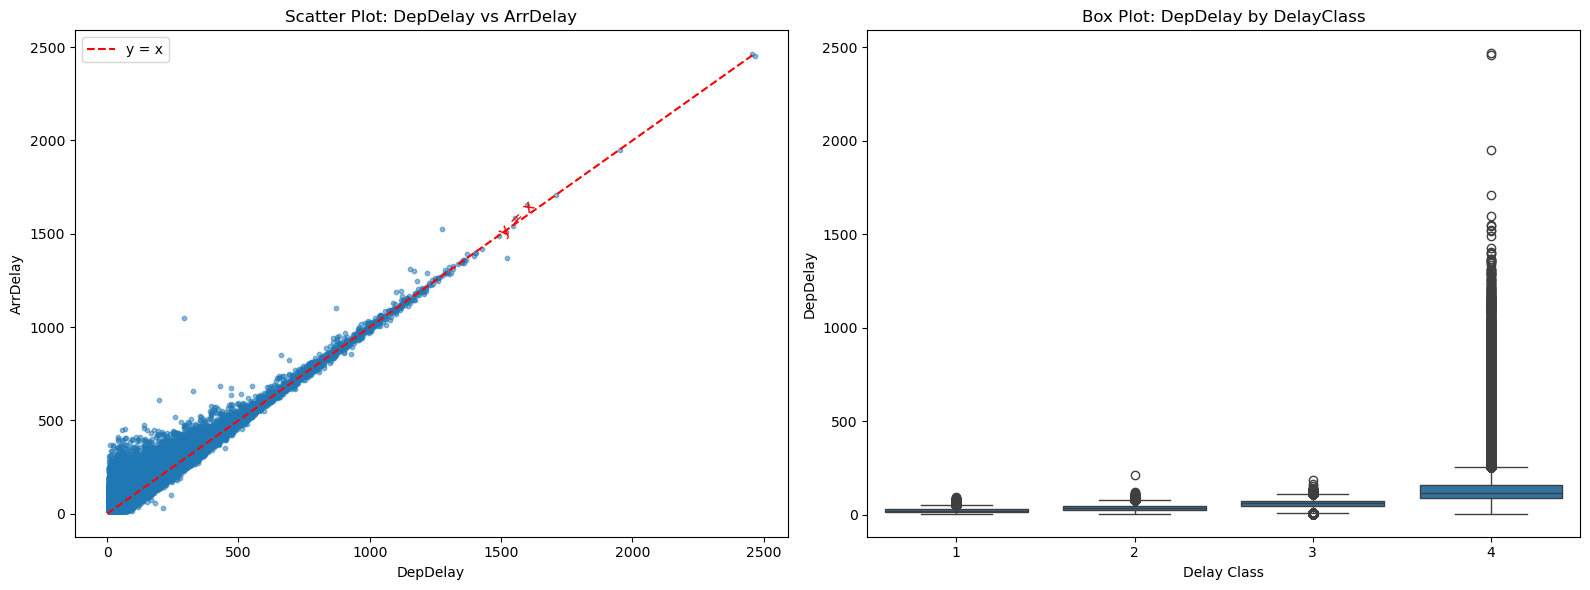

In [10]:

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].scatter(df_selected['DepDelay'], df_selected['ArrDelay'], alpha=0.5, s=10)

x_vals = [0, df_selected['DepDelay'].max()]
y_vals = [0, df_selected['DepDelay'].max()]
axes[0].plot(x_vals, y_vals, color='red', linestyle='--', label='y = x')

text_x = df_selected['DepDelay'].max() * 0.6
axes[0].text(text_x, text_x, 'y = x', color='red', fontsize=12, rotation=45)

axes[0].set_xlabel('DepDelay')
axes[0].set_ylabel('ArrDelay')
axes[0].set_title('Scatter Plot: DepDelay vs ArrDelay')
axes[0].legend()


sns.boxplot(x='DelayClass', y='DepDelay', data=df_selected, ax=axes[1])
axes[1].set_xlabel('Delay Class')
axes[1].set_ylabel('DepDelay')
axes[1].set_title('Box Plot: DepDelay by DelayClass')

plt.tight_layout()
plt.show()




DepDelay (Kalkış Gecikmesi) ile ArrDelay (Varış Gecikmesi) ilişkisinin incelenmesi için scatter grafiği ve boxplot grafikleri çizilmiştir.

DepDelay ile ArrDelay_raw scatter plot'unda güçlü bir doğrusal ilişki gözlenmektedir. Özellikle 0–500 dakika aralığında veri yoğunlaşması, çoğu uçuşun bu aralıkta gerçekleştiğini göstermektedir. Bu aralığın dışındaki uçuşlar daha seyrek olup, kalkış gecikmesinin varış gecikmesi üzerinde doğrudan ve güçlü bir etkisi olduğunu ortaya koymaktadır. Grafiğin üçgene benzemesi, kalkış gecikmesi arttıkça varış gecikmesinin genellikle arttığını, ancak her zaman birebir artmadığını göstermektedir. Genel olarak y=x doğrusunun üzerinde birikim olması ise 0-500 dakika arasındaki varış gecikmelerinin kalkış gecikmelerinden daha uzun olduğunu göstermektedir, bu da varış gecikmesi için kalkış gecikmesinin doğrusal ve güçlü bir ilişkisi olsa da varış gecikmesinin başka faktörlerden de etkilenerek daha fazla olduğunu göstermektedir. 

Boxpolt grafiğine bakıldığında ise; 1. ve 2. sınıfta (kısa ve orta gecikme), DepDelay değerleri çok düşük seviyelerde yoğunlaşmış ve neredeyse hiç değişkenlik göstermemiştir; bu nedenle kutu oluşmamış ya da çok ince bir çizgi şeklinde görünmektedir. Bu durum, düşük varış gecikmesi sınıfındaki uçuşların çoğunlukla zamanında ya da çok az kalkış gecikmesiyle gerçekleştiğini gösterir. 3. sınıfta (uzun gecikme), kutu oluşmakla birlikte hâlâ çok dar bir alanda yoğunlaşmıştır, bu da artan gecikmeyle birlikte kalkış gecikmelerinin etkisinin görülmeye başladığını gösterir. En belirgin fark ise 4. sınıftadır (çok uzun gecikme); burada kutu diğer sınıflara göre daha kalındır ve DepDelay değerlerinin daha geniş bir aralıkta dağıldığını gösterir. Bu kategoride ayrıca kutu dışında üst sınıra kadar uzanan çok sayıda outlier (aykırı değer) görülmektedir. Bu, çok uzun varış gecikmelerinde kalkışta yaşanan sorunların daha belirgin ve değişken olduğunu, ancak tek başına kalkış gecikmesinin yüksek varış gecikmesini tam olarak açıklayamayabileceğini göstermektedir.

***CarrierDelay-ArrDelay İlişkisi***

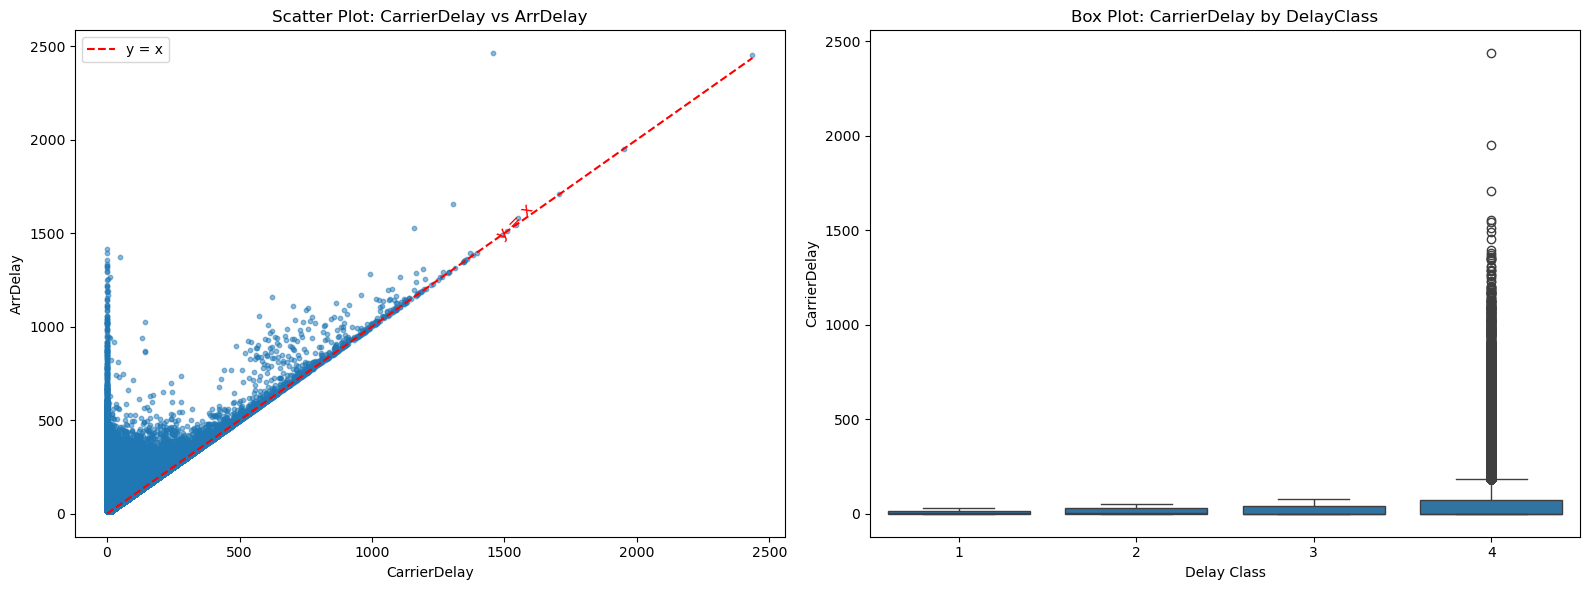

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].scatter(df_selected['CarrierDelay'], df_selected['ArrDelay'], alpha=0.5, s=10)

x_vals = [0, df_selected['CarrierDelay'].max()]
y_vals = [0, df_selected['CarrierDelay'].max()]
axes[0].plot(x_vals, y_vals, color='red', linestyle='--', label='y = x')

text_x = df_selected['CarrierDelay'].max() * 0.6
axes[0].text(text_x, text_x, 'y = x', color='red', fontsize=12, rotation=45)

axes[0].set_xlabel('CarrierDelay')
axes[0].set_ylabel('ArrDelay')
axes[0].set_title('Scatter Plot: CarrierDelay vs ArrDelay')
axes[0].legend()


sns.boxplot(x='DelayClass', y='CarrierDelay', data=df_selected, ax=axes[1])
axes[1].set_xlabel('Delay Class')
axes[1].set_ylabel('CarrierDelay')
axes[1].set_title('Box Plot: CarrierDelay by DelayClass')

plt.tight_layout()
plt.show()

CarrierDelay (Taşıyıcı Gecikmesi) ile ArrDelay (Varış Gecikmesi) ilişkisinin incelenmesi için scatter grafiği ve boxplot grafikleri çizilmiştir.

CarrierDelay ile ArrDelay_raw scatter plot'unda güçlü bir doğrusal ilişki gözlenmektedir. Genel olarak y=x doğrusunun üzerinde birikim olması ise  varış gecikmelerinin taşıyıcı gecikmelerinden daha uzun olduğunu göstermektedir, bununla birlikte, taşıyıcı gecikmesinin olmadığı durumda bile varış gecikmelerinin olduğu görülmektedirbu da varış gecikmesi için taşıyıcı gecikmesinin doğrusal ve güçlü bir ilişkisi olsa da varış gecikmesinin başka faktörlerden de etkilenerek daha fazla olduğunu göstermektedir.

Boxpolt grafiğine bakıldığında ise; 1. sınıfta (kısa gecikme), CarrierDelay değerleri çok düşük seviyelerde yoğunlaşmış ve neredeyse hiç değişkenlik göstermemiştir; bu nedenle kutu oluşmamış ya da çok ince bir çizgi şeklinde görünmektedir. Bu durum, düşük varış gecikmesi sınıfındaki uçuşların çoğunlukla zamanında ya da çok az kalkış gecikmesiyle gerçekleştiğini gösterir. 2. ve 3. sınıfta (orta - uzun gecikme), kutu oluşmakla birlikte hâlâ çok dar bir alanda yoğunlaşmıştır, bu da artan gecikmeyle birlikte taşıyıcı gecikmelerinin etkisinin görülmeye başladığını gösterir. En belirgin fark ise 4. sınıftadır (çok uzun gecikme); burada kutu diğer sınıflara göre daha kalındır ve CarrierDelay değerlerinin daha geniş bir aralıkta dağıldığını gösterir. Bu kategoride ayrıca kutu dışında üst sınıra kadar uzanan çok sayıda outlier (aykırı değer) görülmektedir. Bu, çok uzun varış gecikmelerinde kalkışta yaşanan sorunların daha belirgin ve değişken olduğunu, ancak tek başına kalkış gecikmesinin yüksek varış gecikmesini tam olarak açıklayamayabileceğini göstermektedir.

***LateAircraftDelay-ArrDelay İlişkisi***

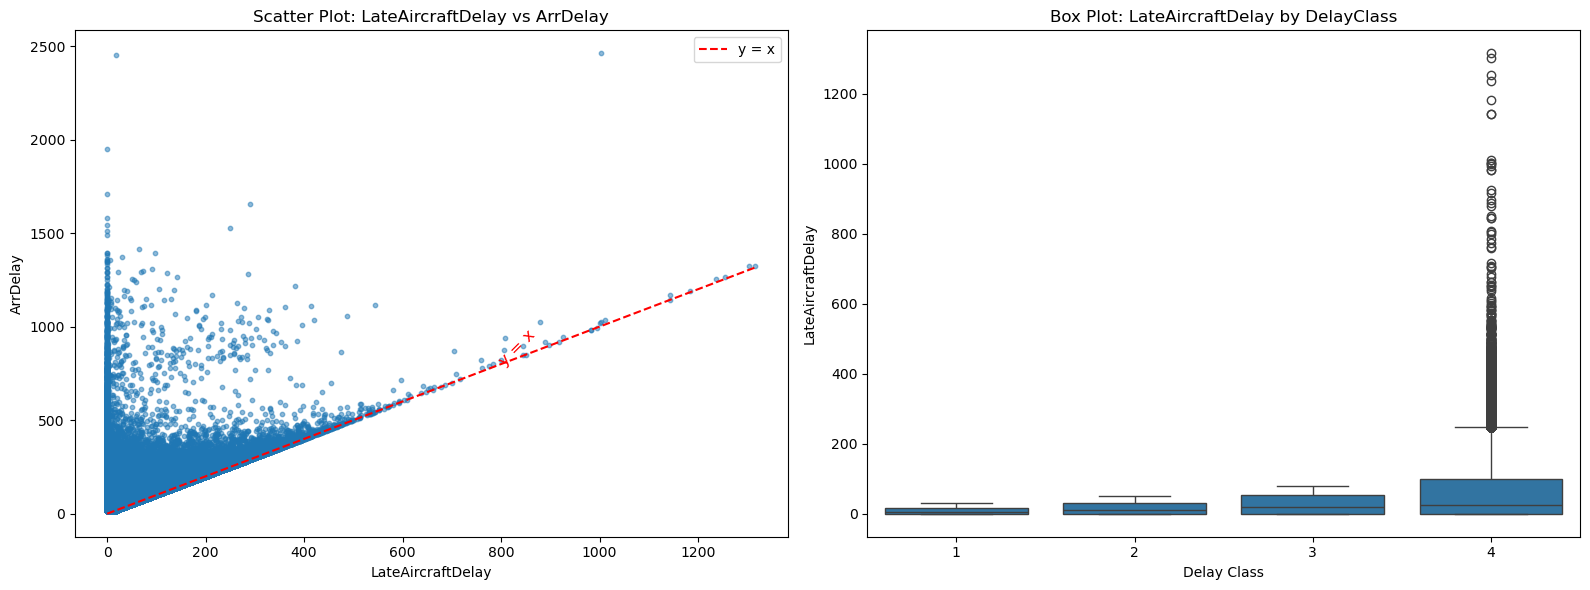

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].scatter(df_selected['LateAircraftDelay'], df_selected['ArrDelay'], alpha=0.5, s=10)

x_vals = [0, df_selected['LateAircraftDelay'].max()]
y_vals = [0, df_selected['LateAircraftDelay'].max()]
axes[0].plot(x_vals, y_vals, color='red', linestyle='--', label='y = x')

text_x = df_selected['LateAircraftDelay'].max() * 0.6
axes[0].text(text_x, text_x, 'y = x', color='red', fontsize=12, rotation=45)

axes[0].set_xlabel('LateAircraftDelay')
axes[0].set_ylabel('ArrDelay')
axes[0].set_title('Scatter Plot: LateAircraftDelay vs ArrDelay')
axes[0].legend()


sns.boxplot(x='DelayClass', y='LateAircraftDelay', data=df_selected, ax=axes[1])
axes[1].set_xlabel('Delay Class')
axes[1].set_ylabel('LateAircraftDelay')
axes[1].set_title('Box Plot: LateAircraftDelay by DelayClass')

plt.tight_layout()
plt.show()

AirCraftDelay (Uçak Gecikmesi) ile ArrDelay (Varış Gecikmesi) ilişkisinin incelenmesi için scatter grafiği ve boxplot grafikleri çizilmiştir.

LateAircraftDelay ile ArrDelay arasındaki scatter plot, gecikmelerin nasıl şekillendiğine dair dikkat çekici bir desen ortaya koymaktadır. Noktaların bir kısmı y = x doğrusu üzerinde yoğunlaşsa da, asıl yoğunluk bu doğrunun üst kısmında, yani ArrDelay'in LateAircraftDelay'den daha büyük olduğu durumlarda toplanmıştır. Bu durum, uçuşlarda geç gelen uçağın dışında ek gecikmelerin (örneğin taşıyıcı kaynaklı, hava durumu, operasyonel işlemler gibi) sık yaşandığını ve toplam varış gecikmesine katkı sağladığını gösterir. Grafikteki V şekli, bir ucu (0, 0-1500) aralığında yoğunlukla başlamakta ve diğer ucu y = x doğrusuna doğru uzanarak iki kanatlı bir yapı çizmektedir. Alt birleşim yerinde (yani x küçük, y büyük bölgede) oluşan bu yoğunluk, özellikle uçak geç gelmese bile varışta ciddi gecikmeler yaşanabildiğini; yani LateAircraftDelay'in düşük olmasına rağmen ArrDelay'in yüksek olabildiğini gösterir. Bu da sistemde başka aksaklıklar olduğunu ve bu değişkenin tek başına tüm gecikmeleri açıklamakta yetersiz kalabileceğini ortaya koyar.

Box plot grafiğinde, LateAircraftDelay değişkeninin ArrDelay sınıflarına göre dağılımı incelendiğinde, gecikme kategorileri arttıkça kutuların kalınlığı da artmaktadır. 1. kategori (kısa gecikme) en ince kutuya sahiptir, yani bu grupta uçakların büyük çoğunluğu geç gelen uçakla ilişkilendirilmemektedir. 2. ve 3. kategorilerde kutular biraz daha genişlemiş olup, geç gelen uçakların bu gecikme gruplarındaki rolünün arttığını göstermektedir. 4. kategori (çok uzun gecikme) ise en geniş kutuya sahip olup, gecikmenin önemli bir kısmının geç gelen uçaktan kaynaklanabileceğini işaret eder. Ayrıca bu kategoride kutunun üst kısmında, y = 200 dakikanın üstünde yoğun şekilde konumlanmış çok sayıda aykırı (outlier) nokta yer almaktadır.

***NASDelay-ArrDelay İlişkisi***

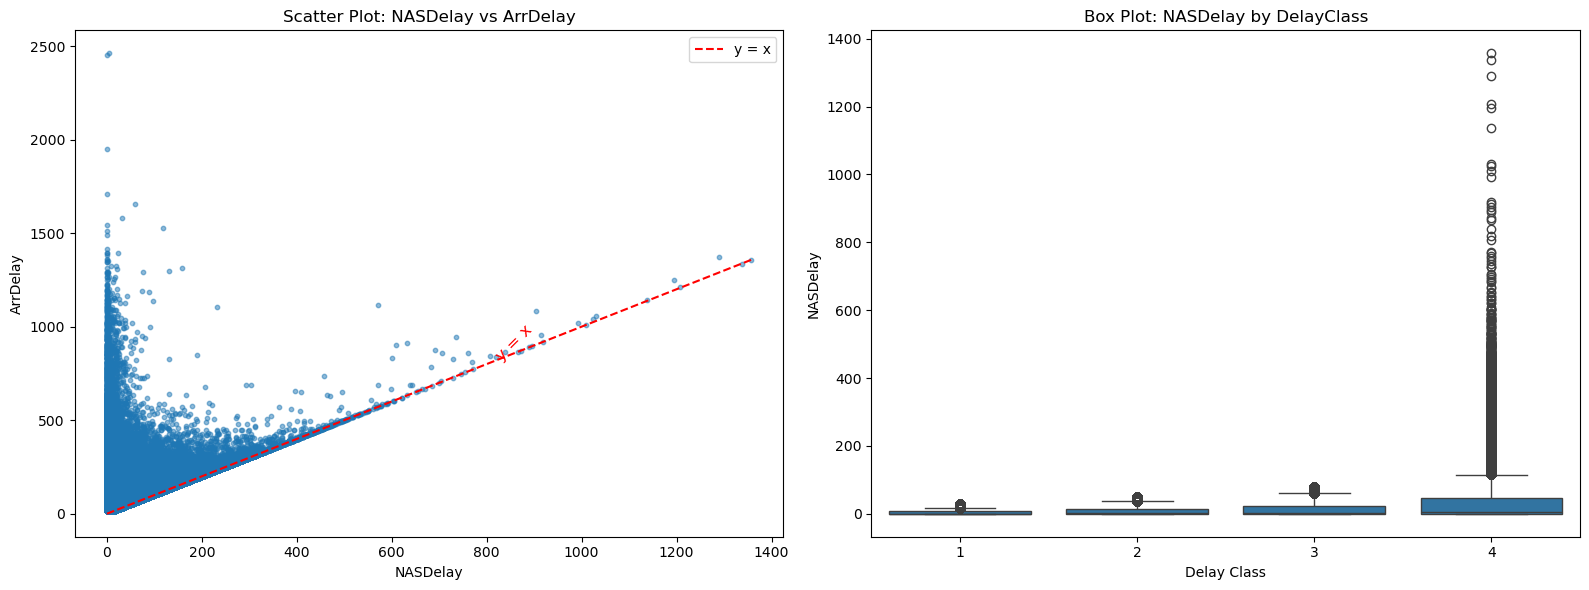

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].scatter(df_selected['NASDelay'], df_selected['ArrDelay'], alpha=0.5, s=10)

x_vals = [0, df_selected['NASDelay'].max()]
y_vals = [0, df_selected['NASDelay'].max()]
axes[0].plot(x_vals, y_vals, color='red', linestyle='--', label='y = x')

text_x = df_selected['NASDelay'].max() * 0.6
axes[0].text(text_x, text_x, 'y = x', color='red', fontsize=12, rotation=45)

axes[0].set_xlabel('NASDelay')
axes[0].set_ylabel('ArrDelay')
axes[0].set_title('Scatter Plot: NASDelay vs ArrDelay')
axes[0].legend()


sns.boxplot(x='DelayClass', y= 'NASDelay', data=df_selected, ax=axes[1])
axes[1].set_xlabel('Delay Class')
axes[1].set_ylabel('NASDelay')
axes[1].set_title('Box Plot: NASDelay by DelayClass')

plt.tight_layout()
plt.show()

NASDelay(Ulusal Hava Sistemi Gecikmesi) ile ArrDelay (Varış Gecikmesi) ilişkisinin incelenmesi için scatter grafiği ve boxplot grafikleri çizilmiştir.

NASDelay ile ArrDelay arasındaki scatter plot, gecikmelerin nasıl şekillendiğine dair dikkat çekici bir desen ortaya koymaktadır. Noktaların bir kısmı y = x doğrusu üzerinde yoğunlaşsa da, asıl yoğunluk bu doğrunun üst kısmında, yani ArrDelay'in NASDelay'den daha büyük olduğu durumlarda toplanmıştır. Bu durum, uçuşlarda hava sistemi dışında ek gecikmelerin (örneğin taşıyıcı kaynaklı, hava durumu, operasyonel işlemler gibi) sık yaşandığını ve toplam varış gecikmesine katkı sağladığını gösterir. Grafikteki V şekli, bir ucu (0, 0-1500) aralığında yoğunlukla başlamakta ve diğer ucu y = x doğrusuna doğru uzanarak iki kanatlı bir yapı çizmektedir. Alt birleşim yerinde (yani x küçük, y büyük bölgede) oluşan bu yoğunluk, özellikle hava sisteminden kaynaklı gecikme olmasa bile varışta ciddi gecikmeler yaşanabildiğini; yani NASDelay'in düşük olmasına rağmen ArrDelay'in yüksek olabildiğini gösterir. Bu da sistemde başka aksaklıklar olduğunu ve bu değişkenin tek başına tüm gecikmeleri açıklamakta yetersiz kalabileceğini ortaya koyar.

Box plot grafiğinde, NASDelay değişkeninin ArrDelay sınıflarına göre dağılımı incelendiğinde, gecikme kategorileri arttıkça kutuların kalınlığı da artmaktadır. 1. kategori (kısa gecikme) en ince kutuya sahiptir, yani bu grupta uçakların büyük çoğunluğu ulusal hava sisteminden kaynaklı gecikmeler ile ilişkilendirilmemektedir. 2. ve 3. kategorilerde kutular biraz daha genişlemiş olup, ulusal hava sisteminden kaynaklı gecikmelerin bu gecikme gruplarındaki rolünün arttığını göstermektedir. 4. kategori (çok uzun gecikme) ise en geniş kutuya sahip olup, gecikmenin önemli bir kısmının ulusal hava sisteminden kaynaklanabileceğini işaret eder. Ayrıca bu kategoride kutunun üst kısmında, y = 200 dakikanın üstünde yoğun şekilde konumlanmış çok sayıda aykırı (outlier) nokta yer almaktadır.

# Veri Ön İşleme - Kategoriler Arası Dengesizlik Kontrolü

Sınıf Sayıları:
 DelayClass
1    417008
2    295022
3    232692
4    302764
Name: count, dtype: int64

Sınıf Yüzdeleri:
 DelayClass
1    33.43
2    23.65
3    18.65
4    24.27
Name: proportion, dtype: float64


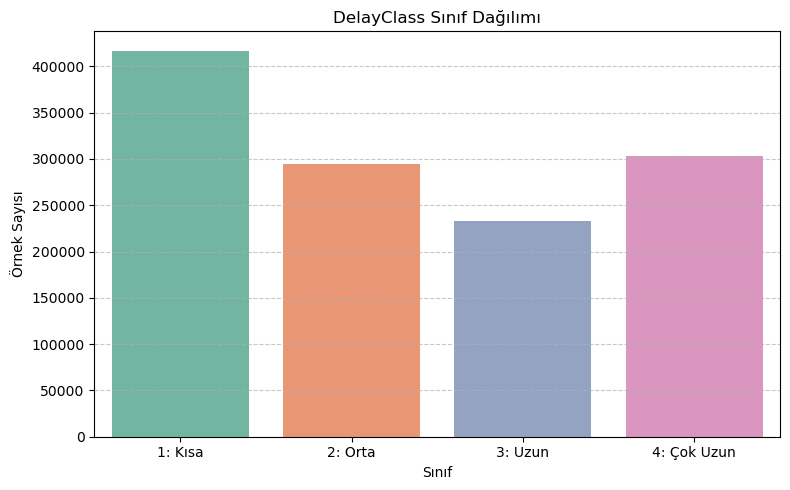

In [14]:

class_counts = df_selected['DelayClass'].value_counts().sort_index()
class_percentages = df_selected['DelayClass'].value_counts(normalize=True).sort_index() * 100


print("Sınıf Sayıları:\n", class_counts)
print("\nSınıf Yüzdeleri:\n", class_percentages.round(2))

plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, hue=class_counts.index, palette='Set2', dodge=False, legend=False)
plt.title('DelayClass Sınıf Dağılımı')
plt.xlabel('Sınıf')
plt.ylabel('Örnek Sayısı')
plt.xticks([0, 1, 2, 3], ['1: Kısa', '2: Orta', '3: Uzun', '4: Çok Uzun'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Veri setinde hedef değişken olarak oluşturulan DelayClass değişkeninin sınıf dağılımına bakıldığında, 1. sınıf (kısa gecikme) %33,4 ile en yüksek orana sahipken, onu %24,3 ile 4. sınıf (çok uzun gecikme), %23,7 ile 2. sınıf (orta gecikme) ve %18,7 ile 3. sınıf (uzun gecikme) takip etmektedir. Sınıf oranları birbirine yakın olsa da, 3. sınıfın belirgin şekilde düşük temsil edildiği gözlemlenmektedir. Bu durum, modelin özellikle 3. sınıfı doğru sınıflandırmakta zorlanmasına neden olabilir. Bu nedenle, model eğitimi sırasında bu dengesizliği gidermek amacıyla class_weight='balanced' parametresi kullanılacak ve modelin az temsil edilen sınıflara daha fazla ağırlık vermesi sağlanacaktır. Bu yöntem ile, verinin yapısını bozmadan sınıflar arası adil öğrenmeyi desteklemek hedeflenmektedir.

# Veri Ön İşleme - x ve y değişkenlerinin tanımlanması ve eğitim-test kümesi ayrımı
Daha önceden temizlenen değişkenler karışıklık olmaması için yeniden tanımlanmış, 

Ardından x bağımsız değişkenleri DepDelay', 'CarrierDelay', 'LateAircraftDelay', 'NASDelay', 'WeatherDelay', 'TaxiOut', 'TaxiIn' olarak,
y hedef değişkeni ise "DelayClass" olarak tanımlanmıştır.

Tüm veri setinin %80'i eğitim, %20'si test verisi olmak üzere kümelere ayrılmıştır.

In [15]:
from sklearn.model_selection import train_test_split

# Bağımsız değişkenler
X = df_selected[['ArrDelay', 'DepDelay', 'TaxiIn', 'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'LateAircraftDelay']]

# Hedef değişken
y = df_selected['DelayClass']

# Eğitim ve test verisi olarak %80 - %20 ayrımı, sınıf dengesini koruyarak
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Eğitim seti boyutu: {X_train.shape[0]} örnek")
print(f"Test seti boyutu: {X_test.shape[0]} örnek")


Eğitim seti boyutu: 997988 örnek
Test seti boyutu: 249498 örnek


# Veri Ön İşleme - Normalizasyon

In [16]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

import pandas as pd
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)


 Modelin farklı ölçeklerdeki özelliklerden kaynaklanan yanlılıklardan korunmasını sağlamak ve modelin daha dengeli öğrenmesi amaçlanarak Standart Scaler ile veriseti normalize edilmiştir. Önce yalnızca eğitim verisine fit edilerek, ortalama ve standart sapma hesaplanır; ardından bu istatistikler kullanılarak hem eğitim hem de test verisi dönüştürülmüştür. Böylece her özellik, ortalaması 0 ve standart sapması 1 olacak şekilde yeniden ölçeklenmiştir.Modelin gerçek dünyadaki performansının doğru ölçülmesi amacı ile test verisi için ayrıca fit edilmemiştir.

# Model Oluşturulması - LOGISTIC REGRESSION KULLANILARAK MODELİN OLUŞTURULMASI

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)


Logistic Regression kullanılarak model oluşturulmuş ve tahminleme uygulanmıştır, model oluşturulurken sınıflar arasındaki dengesizliğin giderilmesi için azınlık sınıflara önem verilmesi hedeflenmiş class_weight=balanced ayarı kullanılmıştır.

# Model Sonuçlarının Değerlendirilmesi

In [18]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, classification_report

pipeline = make_pipeline(MinMaxScaler(), LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'))

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy', n_jobs=-1)

print("Cross Validation Doğruluk Skorları:", cv_scores)
print("Ortalama Doğruluk:", cv_scores.mean())
print("Standart Sapma:", cv_scores.std())

pipeline.fit(X_train, y_train)


y_train_pred = pipeline.predict(X_train)
print("\nEğitim Seti Performansı:")
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("Classification Report:\n", classification_report(y_train, y_train_pred))

y_test_pred = pipeline.predict(X_test)
print("\nTest Seti Performansı:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))


Cross Validation Doğruluk Skorları: [0.93327001 0.91560219 0.92250007 0.92319347 0.91925354]
Ortalama Doğruluk: 0.9227638542587637
Standart Sapma: 0.0059033059721381315

Eğitim Seti Performansı:
Confusion Matrix:
 [[319620  13981      5      0]
 [ 19550 204608  11858      1]
 [     0  12579 171125   2450]
 [     0      0  15706 226505]]
Classification Report:
               precision    recall  f1-score   support

           1       0.94      0.96      0.95    333606
           2       0.89      0.87      0.88    236017
           3       0.86      0.92      0.89    186154
           4       0.99      0.94      0.96    242211

    accuracy                           0.92    997988
   macro avg       0.92      0.92      0.92    997988
weighted avg       0.93      0.92      0.92    997988


Test Seti Performansı:
Confusion Matrix:
 [[79911  3491     0     0]
 [ 4894 51193  2918     0]
 [    1  3208 42681   648]
 [    0     0  4005 56548]]
Classification Report:
               precision   

Model 5 katlı cross-validation ile ortalama %92,3 doğruluk ve düşük standart sapma (0,0059) göstererek genel olarak tutarlı ve stabil bir performans sergilemektedir. Eğitim setinde sınıflar bazında precision ve recall değerleri yüksek olup özellikle 1. ve 4. sınıflarda %94 üzeri precision ve %94-96 arası recall gözlenmiştir; bu, modelin bu sınıfları hem doğru tahmin etmede hem de eksik bırakmada başarılı olduğunu göstermektedir. 2. ve 3. sınıflarda ise biraz daha düşük ama hâlâ güçlü bir performans (precision ve recall %86-89 arası) vardır, bu da modelin bu sınıfları ayırt etmede biraz daha zorlandığını göstermektedir. Test setinde benzer sonuçlar korunmuş, doğruluk %92 civarında kalmış, recall ve precision değerlerinde ciddi bir düşüş olmamıştır; bu da modelin aşırı öğrenme (overfitting) yapmadığını ve genelleme kabiliyetinin iyi olduğunu göstermektedir. Confusion matrix’te gözlenen sınıflar arası karışıklık, özellikle 2. ve 3. sınıflar arasında olurken, diğer sınıflar için model oldukça net ayrım yapmaktadır. 

Sonuç olarak, model sınıflar arası dengeli bir şekilde yüksek performans sağlamakta olup, özellikle kritik gecikme sınıflarında etkin tahmin yapabilmektedir; ileride model iyileştirmeleri için özellikle 2. ve 3. sınıf tahminlerinin geliştirilmesi hedeflenebilir.

# Modelin Hiperparametre Optimizasyonu Yapılarak Yeniden Uygulanması

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler


param_grid = {
    'logisticregression__C': [0.01, 0.1, 1, 10],
    'logisticregression__max_iter': [500]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=1)
grid_search.fit(X, y)

print("En iyi parametreler:", grid_search.best_params_)
print("En iyi doğruluk:", grid_search.best_score_)

En iyi parametreler: {'logisticregression__C': 10, 'logisticregression__max_iter': 500}
En iyi doğruluk: 0.9538960832228055


Lojistik regresyon modelinin performansını artırmak için hiperparametre optimizasyonu yapıldı. Öncelikle veri ölçeklendirme için MinMaxScaler ve sınıflandırma için LogisticRegression yer alan bir pipeline oluşturuldı. Ardından, modelin önemli iki parametresi olan C (düzenleme gücü) ve max_iter (maksimum iterasyon sayısı) için farklı değerlerin denenmesi amacıyla bir parametre ızgarası (param_grid) belirlendi. GridSearchCV fonksiyonu, bu parametre kombinasyonlarını 5 katlı cross-validation (çapraz doğrulama) ile test edilerek, her biri için modelin doğruluk (accuracy) skoru hesaplandı ve en iyi sonucu veren parametreler belirlenmesi amaçlanmıştır.

Sonuç olarak, modelin en iyi doğruluk değerini C=10 ve max_iter=500 parametreleriyle elde ettiği görüldü. Bu doğruluk oranı %95.38 gibi  yüksek bir değeri göstermekte olup modelin verideki sınıfları neredeyse doğru şekilde tahmin ettiği tespit edilmiştir.

C=10 değeri, modelin aşırı uyuma (overfitting'i önlemeye) daha az ağırlık verip, veriye daha esnek uyum sağladığını ifade etmektedir. max_iter=500 ise modelin eğitim sürecinde yeterli sayıda iterasyon yaparak parametreleri optimize ettiğini göstermektedir.

Bu yüksek doğruluk seviyesi, geliştirilmiş modelin sınıflandırma başarısının iyi olduğunu gösterse de, aşırı uyum (overfitting) riskinin olup olmadığını kontrol etmek gerekmektedir. Bu nedenle diğer performans metrikleri (precision, recall, f1-score) da incelenecektir.

# En iyi Performans Gösteren Modelin Değerlendirilmesi

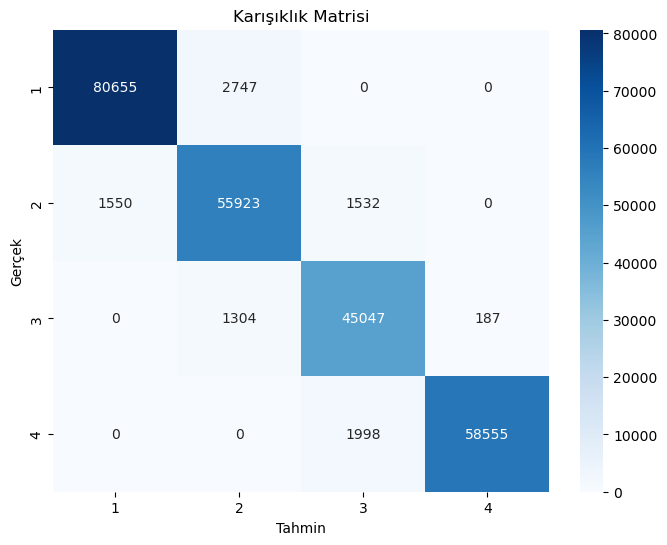

Doğruluk (Accuracy): 0.962653007238535
Kesinlik (Precision) (macro): 0.9594368038300068
Duyarlılık (Recall) (macro): 0.9624490140466094
F1 Skoru (macro): 0.9607491510141423

Classification Report:

              precision    recall  f1-score   support

           1     0.9811    0.9671    0.9741     83402
           2     0.9325    0.9478    0.9400     59005
           3     0.9273    0.9680    0.9472     46538
           4     0.9968    0.9670    0.9817     60553

    accuracy                         0.9627    249498
   macro avg     0.9594    0.9624    0.9607    249498
weighted avg     0.9634    0.9627    0.9629    249498



In [20]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.xlabel('Tahmin')
plt.ylabel('Gerçek')
plt.title('Karışıklık Matrisi')
plt.show()

# Performans metrikleri
print("Doğruluk (Accuracy):", accuracy_score(y_test, y_pred))
print("Kesinlik (Precision) (macro):", precision_score(y_test, y_pred, average='macro'))
print("Duyarlılık (Recall) (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Skoru (macro):", f1_score(y_test, y_pred, average='macro'))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, digits=4))

Hiperparametre optimizasyonu sonucu elde edilen en iyi modeli (best_model) seçildi, test veri setindeki özelliklerden (x_test) tahminler yapıldı ve bu tahminlerle gerçek test hedef değerlerini (y_test) karşılaştırıldı. Tahminlerin doğruluğunu anlamak için karışıklık matrisi (confusion_matrix) oluşturuldu ve bu matris görsel olarak seaborn kütüphanesiyle ısı haritası şeklinde gösterildi.

Daha önce hedef değişken (1,2,3,4) olmak üzere 4 sınıfa ayrılmıştır.

Karışıklık ısı haritası çıktısına bakılarak en başarılı performansın sınıf 1 tahminlemesinde olabileceği, en az başarılı performansın sınıf 3 tahminlemesinde olabileceği gözlenmekte olup modelin performansına ilişkin kesin yorum yapılabilmesi için diğer metriklerin de değerlendirilmesi gerekmektedir.

Ek olarak model performansını ölçmek için doğruluk (accuracy), kesinlik (precision), duyarlılık (recall) ve F1 skoru gibi temel sınıflandırma metrikleri hesaplanmış olup her sınıf için ayrıntılı değerlendirme raporu (classification_report) yazdırıldı. Bu sonuçlara bakıldığında; Sınıf 1 için precision (kesinlik) ve recall (duyarlılık) %98.11 civarında, Sınıf 2 için precision  (%93.25), Sınıf 3 için precision  %92.73 seviyesinde, Sınıf 4 için precision %99.68 olarak gözlenmiş olup en yüksek performansı sınıf 4'ün verdiği görülmektedir.

Macro average değerleri, her sınıfın eşit ağırlıklı ortalamasını temsil etmekte olup yaklaşık %96 seviyesindedir.

Weighted average’ın accuracy ile neredeyse aynı çıkması, modelin sınıf dağılımını başarıyla öğrenebildiğini göstermekte olup sınıf dengesizliğin dengelenmesinin performansa olumsuz etki etmediği söylenebilir.

# Modelin Matematiksel Olarak İfade Edilmesi 

In [22]:
logreg = best_model.named_steps['logisticregression']


coefficients = logreg.coef_[0]
intercept = logreg.intercept_[0]


feature_names = X.columns


equation = f"logit(P) = {intercept:.4f}"
for coef, name in zip(coefficients, feature_names):
    sign = "+" if coef >= 0 else "-"
    equation += f" {sign} {abs(coef):.4f}*{name}"

print("Model Denklemi:")
print(equation)

Model Denklemi:
logit(P) = 18.4882 - 755.1712*ArrDelay - 228.8417*DepDelay - 5.6255*TaxiIn - 13.4527*TaxiOut - 366.3712*CarrierDelay - 199.7896*WeatherDelay - 289.8062*NASDelay - 192.7658*LateAircraftDelay


# Tahmin Olasılıklarının Görselleştirilmesi

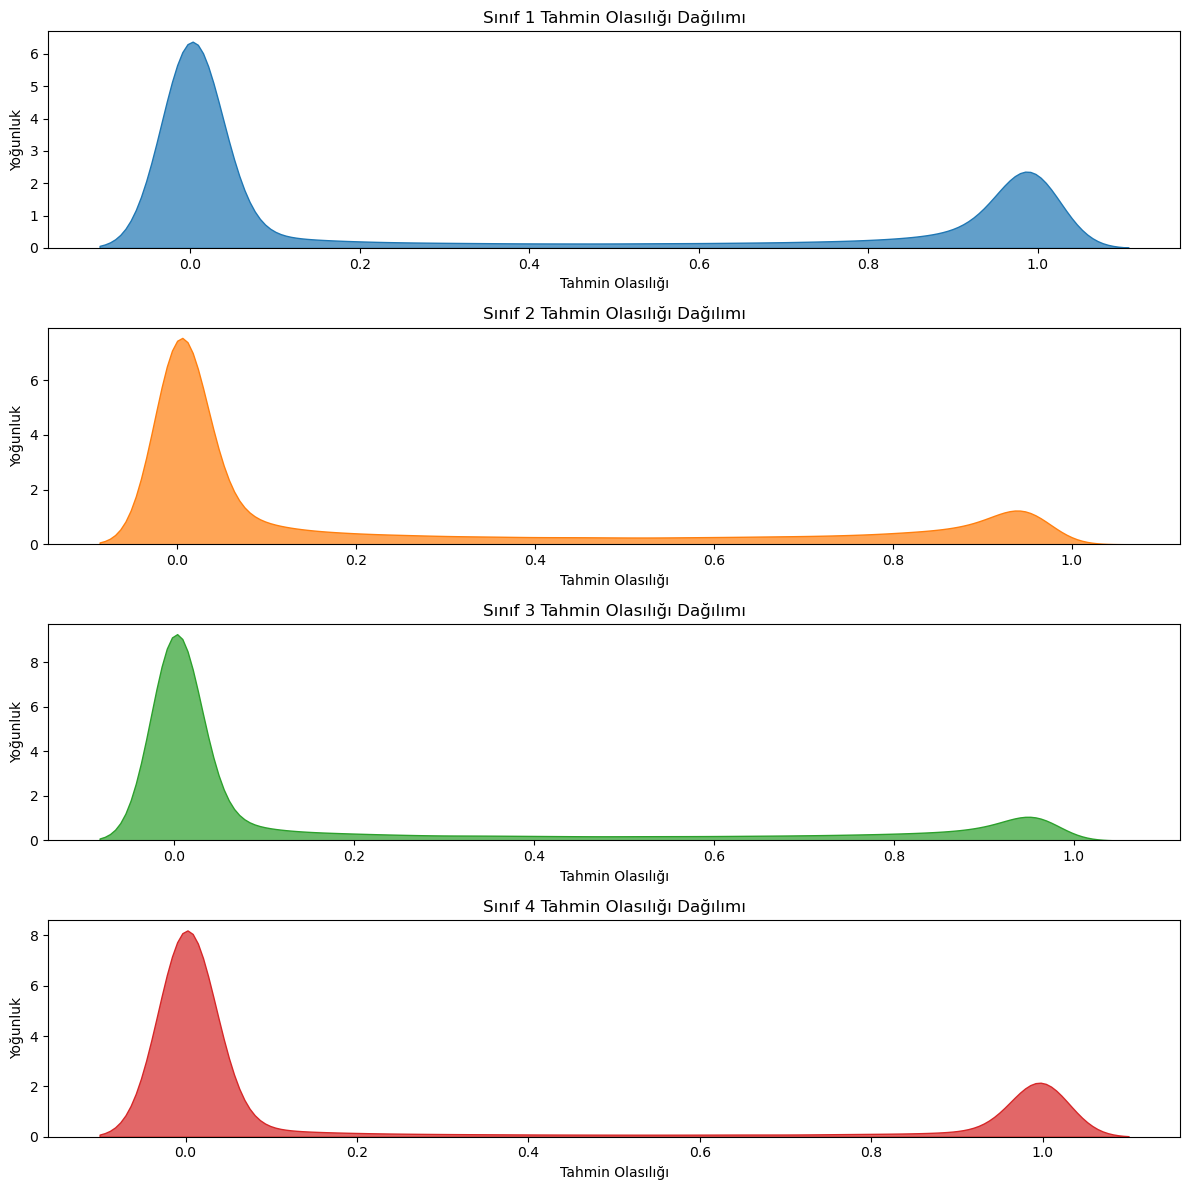

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Test seti için tahmin olasılıklarını al
y_prob = best_model.predict_proba(X_test)

# Sınıf isimleri
class_names = y_train.unique()
class_names.sort()

# Her sınıf için olasılıkların dağılımını çiz
plt.figure(figsize=(12, 3 * len(class_names)))

for i, class_name in enumerate(class_names):
    plt.subplot(len(class_names), 1, i+1)
    sns.kdeplot(y_prob[:, i], fill=True, alpha=0.7, color=sns.color_palette("tab10")[i])
    plt.title(f'Sınıf {class_name} Tahmin Olasılığı Dağılımı')
    plt.xlabel('Tahmin Olasılığı')
    plt.ylabel('Yoğunluk')

plt.tight_layout()
plt.show()


Modelin tahmin olasılığı dağılım grafikleri incelendiğinde, dört sınıf için genel olarak güçlü ve net ayrımlar yapıldığı görülmektedir. Sınıf 1 ve Sınıf 4’e ait grafiklerde tahminler çoğunlukla ya çok düşük (0’a yakın) ya da çok yüksek (1’e yakın) olasılıklarla yapılmış; modelin bu sınıfları oldukça güvenle tanıdığını göstermektedir. Sınıf 2 için de benzer bir yapı görülmekle birlikte, sağdaki tepenin biraz daha yayvan olması model bazı örneklerde daha düşük güvenle karar vermiş olabileceğini göstermektedir. Sınıf 3 ise diğer sınıflara kıyasla daha zayıf ayrışmış; özellikle yüksek olasılık tepesinin daha düşük ve yaygın olması, bu sınıf için modelin daha fazla kararsızlık yaşamış olabileceğini göstermektedir.

Genel olarak tüm sınıflarda ciddi bir çakışma ya da yüksek belirsizlik görülmemektedir.

Kullanılan model, MinMax normalizasyonu ve L2 düzenlemeli Logistic Regression algoritmasından oluşan bir pipeline'dır ve hiperparametre optimizasyonu sonrasında %96.2 doğruluk oranına ulaşmıştır. Özellikle macro F1 skoru olan %96.0, modelin tüm sınıflarda dengeli ve başarılı tahminler yaptığını göstermektedir. Precision ve recall skorlarının da oldukça yüksek olması, modelin hem doğru sınıflamaları hem de eksik sınıflamaları minimumda tuttuğunu kanıtlamaktadır. Bu sonuçlar, modelin operasyonel anlamda hem güvenilir hem de tutarlı kararlar verebilecek düzeyde olduğunu açıkça ortaya koymaktadır.

Oluşturulan modelin temel işlevi, havayolu taşımacılığında uçuşların gecikme süresine göre sınıflandırılmasını sağlamaktır. Girdi olarak uçuşlara ilişkin çeşitli gecikme kaynakları (kalkış gecikmesi, taksi süresi, hava koşulları kaynaklı gecikmeler vb.) alındığında, model bu uçuşun hangi gecikme sınıfına ait olduğunu yüksek doğrulukla tahmin edebilmektedir. 

Oluşturulan model, havayolu şirketleri tarafından operasyonel planlama süreçlerinde kullanılabilir; örneğin gecikme riski yüksek olan uçuşlar önceden tespit edilerek, kaynakların proaktif biçimde yönetilmesi sağlanabilir. 

Modelin daha da geliştirilmesi için ileri seviye sınıf dengesizliği teknikleri (örneğin SMOTE), model karşılaştırmaları (Random Forest, XGBoost gibi), zaman serisi verilerinin entegrasyonu ya da modelin gerçek zamanlı tahmin sistemi haline getirilmesi gibi yollar izlenebilir. 